Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". (After you have done that, you can delete the 'raise NotImplementedError()' line, and then run your code to check that it works).

Also, enter your NAME in the next cell.


In [2]:
NAME = "Gagandeep Kaur"

---

# ICT706 SouthBank 2020 Semester 1 Task 2

This assignment will be done completely inside this Jupyter notebook.

### Background
A medium-size company has given you one year of data about the online purchases that their customers have made.  They want you to analyse the data using statistical and machine learning techniques and produce:
* a prediction algorithm for predicting how much money each customer is likely to spend in a year;
* a classification algorithm for predicting which customers will be 'big spenders';
* some recommendations on what marketing strategy they should use to attract more 'big spender' customers.

### Instructions
Follow all the instructions in this notebook to complete these tasks.  Note that some cells contain 'assert' statements - these will automatically mark your work so that you can check that you have done the preceeding steps correctly.  (If they give errors, then go back and correct your previous work until you fix those errors.  Once those 'assert' cells execute without errors, you know that you have achieved the marks for that step.) 

When you have finished, this notebook is the only file that you will need to submit to Blackboard.

Note: If you want some space to try out some Python code of your own, feel free to add extra cells into this notebook.  Just make sure that before you submit your notebook, that those extra cells execute without error, or that you delete them before submitting.

### Overview
You have five sections to complete in this Notebook (total = 100 marks):
* Part A: Load and Clean Data (20 points)
* Part B Data Exploration (30 points)
* Part C: Predicting Spending Levels (20 points)
* Part D: Predicting Big Spenders (20 points)
* Part E: Business Recommendations (10 points)

In [1]:
# add all your imports here.
# YOUR CODE HERE
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
#raise NotImplementedError()

---
# Part A: Load and Clean Data (20 points)

Save your CSV data file into the same folder as this notebook.

Write Python code to load your dataset into a Pandas DataFrame called 'sales'.

In [2]:
# YOUR CODE HERE
sales=pd.read_csv("GreenHat_Sales.csv")
print(sales)
#raise NotImplementedError()

      CustNum             Name     Sex  Age State  Income  Clicks LastSpend  \
0           0   Brandon Bender    male   67   NSW  120000     709  $2488.59   
1           1  Andre Mccormick    male   38   VIC  140000     630  $4295.34   
2           2     Ashley Smith  female   47   NSW   50000     554  $1986.09   
3           3        Ann Riley  female   33   NSW  100000     309  $1532.64   
4           4   Timothy Chavez    male   49   NSW  140000     520  $2082.08   
...       ...              ...     ...  ...   ...     ...     ...       ...   
9995     9995        Jason Kim    male   61   NSW  160000     672  $6359.81   
9996     9996  Daniel Martinez    male   53   NSW  120000     421  $1275.63   
9997     9997   Michele Oneill  female   65   NSW   40000     342   $895.36   
9998     9998  Brian Schneider    male   16    SA   70000     495  $1198.89   
9999     9999   Marcus Watkins    male   26   QLD  120000     587  $2070.94   

      Purchases     Spend  
0             8  $1615.

After you have loaded the data correctly, you should have 10,000 rows. 
Run the following cells and tests to check that you have done this correctly.

In [3]:
sales.head()

,CustNum,Name,Sex,Age,State,Income,Clicks,LastSpend,Purchases,Spend
0,0,Brandon Bender,male,67,NSW,120000,709,$2488.59,8,$1615.00
1,1,Andre Mccormick,male,38,VIC,140000,630,$4295.34,14,$1927.20
2,2,Ashley Smith,female,47,NSW,50000,554,$1986.09,8,$1660.80
3,3,Ann Riley,female,33,NSW,100000,309,$1532.64,10,$3041.10
4,4,Timothy Chavez,male,49,NSW,140000,520,$2082.08,8,$1764.40


In [4]:
"""Check that 'sales' has the right shape and number of rows (5 points)."""
assert len(sales.columns) == 10
assert sales.columns[0] == "CustNum"
assert sales.shape == (10000, 10)

## Cleaning the Data

Some of the columns are strings, with dollar signs.  But we need to convert them to numbers (float) so that we can do calculations on them.  The next cell shows what will go wrong if we try doing calculations *before* converting them floats!

In [5]:
s2 = sales["Spend"] * 4
s2.head()

0    $1615.00$1615.00$1615.00$1615.00
1    $1927.20$1927.20$1927.20$1927.20
2    $1660.80$1660.80$1660.80$1660.80
3    $3041.10$3041.10$3041.10$3041.10
4    $1764.40$1764.40$1764.40$1764.40
Name: Spend, dtype: object

In [6]:
# Complete the following remove_dollar function 
# so that it removes any dollar signs and spaces
# and then returns the string as a number (float).
def remove_dollar(s):
    """Removes dollar signs and spaces from s.
    Returns it as a float.
    """
    # YOUR CODE HERE
    s2=s.replace("$","").replace(" ","")
    return float(s2)
    #raise NotImplementedError()

In [7]:
"""Check that remove_dollar() removes dollars and spaces properly (5 points)."""
assert remove_dollar("12") == 12.0
assert remove_dollar("$123") == 123.0
assert remove_dollar("  $1234") == 1234.0
assert remove_dollar(" $42.3 ") == 42.3

## Clean up the Spend columns

Apply your remove_dollar function to the "Spend" column (every row), and put the cleaned-up float values into a new column of your 'sales' DataFrame called **"SpendValue"**.

Then do the same for the "LastSpend" column and put the float values into a new column called **"LastSpendValue"**.

In [8]:
# YOUR CODE HERE
sales["SpendValue"]=sales["Spend"].map(remove_dollar)
sales["LastSpendValue"]=sales["LastSpend"].map(remove_dollar)
#raise NotImplementedError()

In [9]:
sales.dtypes

CustNum             int64
Name               object
Sex                object
Age                 int64
State              object
Income              int64
Clicks              int64
LastSpend          object
Purchases           int64
Spend              object
SpendValue        float64
LastSpendValue    float64
dtype: object

In [10]:
# check the new SpendValue columns (5 points)
assert sales.columns.contains("SpendValue")
assert sales.columns.contains("LastSpendValue")
# check that they are floats
assert sales["SpendValue"].dtype == "float64"
assert sales["LastSpendValue"].dtype == "float64"
# check that the values are greater than zero.
assert (sales["SpendValue"] > 0.0).all()
assert (sales["LastSpendValue"] >= 0.0).all()

AttributeError: 'Index' object has no attribute 'contains'

## Make Sex and State numeric

To use the Sex and State columns as input features for the machine learning algorithms in Scikit-Learn they must be numeric.

Use the **LabelEncoder** object from the sklearn.preprocessing package to convert the 'Sex' column into an integer column called **"SexValue"**.  

Also convert the "State" column into a integer column called **"StateValue"**. 

In [11]:
# YOUR CODE HERE
le=LabelEncoder()
le.fit(sales['Sex'])
sales['SexValue']=le.transform(sales['Sex'])
le.fit(sales['State'])
sales['StateValue']=le.transform(sales['State'])
#raise NotImplementedError()

In [12]:
# see if Sex has been mapped to ints properly?
cols = ["Name", "Sex", "SexValue"]
sales[cols].head()

,Name,Sex,SexValue
0,Brandon Bender,male,1
1,Andre Mccormick,male,1
2,Ashley Smith,female,0
3,Ann Riley,female,0
4,Timothy Chavez,male,1


In [13]:
# see if State has been mapped to ints properly?
cols = ["Name", "State", "StateValue"]
sales[cols].head(10)

,Name,State,StateValue
0,Brandon Bender,NSW,1
1,Andre Mccormick,VIC,6
2,Ashley Smith,NSW,1
3,Ann Riley,NSW,1
4,Timothy Chavez,NSW,1
5,John Bennett,VIC,6
6,Teresa Wise,QLD,3
7,Andrew Nelson,QLD,3
8,Jon Aguilar,NSW,1
9,Priscilla Briggs,NSW,1


In [14]:
# test the new SexValue and StateValue columns (5 points)
assert sales.columns.contains("SexValue")
assert sales.columns.contains("StateValue")
# check that they are integer
assert str(sales["SexValue"].dtype).startswith("int")   # "int32" or "int64"
assert str(sales["StateValue"].dtype).startswith("int") # "int32" or "int64"
# check that the values are greater than zero.
assert sales["SexValue"].max() == 1    # 0 and 1 only
assert sales["StateValue"].max() == 7  # 7 states in Australia

AttributeError: 'Index' object has no attribute 'contains'

In [15]:
# Finally, let us view just the numeric columns.
numcols = ["CustNum", "SexValue", "Age", "StateValue",
           "Income", "Clicks", "Purchases", "SpendValue"]
sales[numcols].head()

,CustNum,SexValue,Age,StateValue,Income,Clicks,Purchases,SpendValue
0,0,1,67,1,120000,709,8,1615.0
1,1,1,38,6,140000,630,14,1927.2
2,2,0,47,1,50000,554,8,1660.8
3,3,0,33,1,100000,309,10,3041.1
4,4,1,49,1,140000,520,8,1764.4


---

# Part B Data Exploration (30 points)

In this section, you will explore the data statistically and visually, to get a feel for what kinds of data you have, and how much people are spending on your web site.

## B.1 Data Inspection

Start by using the Pandas **describe()** function to analyse all the numeric columns of your 'sales' DataFrame.  Spend some time looking at this and making sure that you understand the average (mean) and range (min and max) of each column.

In [16]:
# YOUR CODE HERE
sales.describe()
#raise NotImplementedError()

,CustNum,Age,Income,Clicks,Purchases,SpendValue,LastSpendValue,SexValue,StateValue
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000
mean,4999.50000,44.388500,80260.000000,501.40390,8.45270,1898.661955,2024.320991,0.50590,3.015300
std,2886.89568,16.796832,42091.918143,289.59793,4.96355,1187.795229,1855.160796,0.49999,2.235434
min,0.00000,16.000000,20000.000000,0.00000,1.00000,320.800000,0.000000,0.00000,0.000000
25%,2499.75000,30.000000,40000.000000,251.00000,5.00000,984.850000,641.597500,0.00000,1.000000
50%,4999.50000,44.000000,80000.000000,502.00000,7.00000,1627.750000,1447.640000,1.00000,3.000000
75%,7499.25000,59.000000,120000.000000,753.00000,11.00000,2500.000000,2877.345000,1.00000,6.000000
max,9999.00000,73.000000,160000.000000,1000.00000,24.00000,5880.000000,11676.310000,1.00000,7.000000


### Data Inspection Questions

In the next cell, write your observations about the "SpendValue" and "Purchases" columns.  For each column, say what the average value is and discuss what that means in terms of your sales to an average person.  Also discuss the min and max values.  

Based on the "SpendValue" column, explain how much your "big spenders" (the top 25% percent of your clients) are spending each year.  This will be a range of values, such as from 1000 to 2000 dollars.

Your discussion must all be in the next cell.  

Add three level-2 headings in that cell to break your discussion into topics: "Purchases column", "SpendValue column", and "Big Spenders".

# Answer:

## Purcase Column
Average value of purchase column is 8.45270,this means that an average person buys 8 items from greenhats.Minimun number of purchase was 1 while maximun purchases were 24. Top 25% customers bought 11 items.   
## SpendValue Column
Average value of SpendValue column is 1898.6195, this means an averagge person spend 1898.60 dollars each year.Minimum spending was 320.80 dollars and maximum value spend by customer was 5880 dollars.   
## Big Spenders
Top spender each year spend from 2500 dollars to 5880 dollars and they purchase 11 to 24 items esch year.

## B.2 Differences between States

We want to know where most of our customers live and whether customers from certain areas spend more or less than average.  Write some Pandas code to calculate and display the total **number of customers** in each Australian state (NSW, QLD, VIC, etc.) and their average **SpendValue**.  

Hint: you could do this by *grouping* your 'sales' table, or by *looping* through all the states, or several other ways.

In [17]:
# YOUR CODE HERE
finding=sales.groupby('State').SpendValue.agg(['count','mean']).rename(columns={"count":"Customer","mean":"Average_spending"})
finding
#raise NotImplementedError()

,Customer,Average_spending
State,,
ACT,311,1840.961576
NSW,4341,1925.515296
NT,75,1804.832000
QLD,1656,1868.604952
SA,652,1917.823850
TAS,161,1874.114907
VIC,2347,1887.506604
WA,457,1845.765317


### Graphical Comparison of States

Now *graph* your results, so that you can see them visually.

NOTE: since the states in Australia have very different populations, you should also calculate and graph the number of customers *relative* to the population of each state (you can use Google to find populations of each state).

So you should show at least the following three graphs:
* the absolute number of customers in each state;
* the number of customers in each state as a percentage of the population of that state;
* the average SpendValue of customers in each state (dollars/customer).

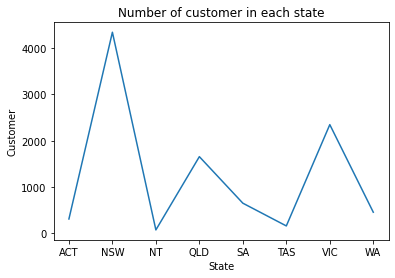

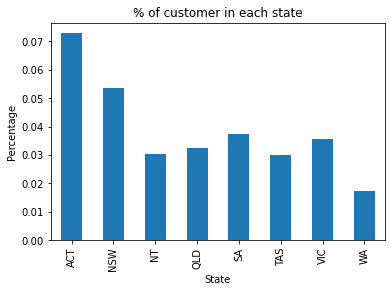

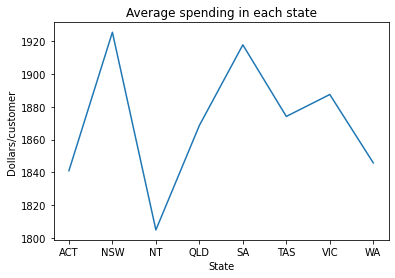

In [18]:
# YOUR CODE HERE
#absolute number of customers in each state
absolute_number=sales.groupby("State").CustNum.count()
plt.plot(absolute_number)
plt.xlabel("State")
plt.ylabel("Customer")
plt.title("Number of customer in each state")
plt.show()
#persentage of customers in each state
population=pd.Series({"ACT":426709,"NSW":8089526,"NT":245869,"QLD":5095100,"SA":1751693,"TAS":534281,"VIC":6594804,"WA":2621680})
no_of_customer=sales.groupby('State').SpendValue.count()
percent=no_of_customer*100/population
percent.plot.bar()
plt.ylabel("Percentage")
plt.title("% of customer in each state")
plt.show()
#average SpendValue of customer in each state(dollars/customer)
avgr=sales.groupby('State').SpendValue.mean()
avgr.plot()
plt.ylabel("Dollars/customer")
plt.title("Average spending in each state")
plt.show()
#raise NotImplementedError()

### Question:
Discuss these graphs and explain your conclusions.

For example, are there *significant* differences in the average spend in different states?  Are our customer spread evenly across Australia, or concentrated in particular areas? 

Write your answer in the next cell, and give reasons for your conclusions.

### Answer:
Analysis of three graphs produces following results:
1. New South Wales has maximun number of customers that is 4341,all other states have half of customers. Northern Territory has least number of customers.
2. ACT has highest percentage of customer as compared to state population,NSW has second hhighest percentage. Other states have percentage less than 0.03 %
3. NSW and SA has top spender who spend more than 1900 dollars,NT has least avergae spending by a customer.

---

# Part C: Predicting Spending Levels (20 points)

Using the LinearRegression function from the Scikit-Learn library (**sklearn**), build a machine learning model for predicting the expected **SpendValue** for a customer.  

Measure the performance of your model using 10-fold cross-validation with a test set size of 20% and print various measures of how accurate your predictions are.

In [19]:
sales.head()

,CustNum,Name,Sex,Age,State,Income,Clicks,LastSpend,Purchases,Spend,SpendValue,LastSpendValue,SexValue,StateValue
0,0,Brandon Bender,male,67,NSW,120000,709,$2488.59,8,$1615.00,1615.0,2488.59,1,1
1,1,Andre Mccormick,male,38,VIC,140000,630,$4295.34,14,$1927.20,1927.2,4295.34,1,6
2,2,Ashley Smith,female,47,NSW,50000,554,$1986.09,8,$1660.80,1660.8,1986.09,0,1
3,3,Ann Riley,female,33,NSW,100000,309,$1532.64,10,$3041.10,3041.1,1532.64,0,1
4,4,Timothy Chavez,male,49,NSW,140000,520,$2082.08,8,$1764.40,1764.4,2082.08,1,1


In [20]:
# YOUR CODE HERE
x=sales[['CustNum','Age','Income','Clicks','Purchases','LastSpendValue','SexValue','StateValue']]
y=sales['SpendValue']
#20% test data 
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)
regr=LinearRegression()
regr.fit(X_train,y_train)

#cross validation
scores = cross_val_score(regr, X_train, y_train, cv=10)
print(scores)
sales_y_pred = regr.predict(X_test)

# Statistics
mse = mean_squared_error(y_test, sales_y_pred)
r2 = r2_score(y_test, sales_y_pred)
print("Mean squared error: {:.2f}".format(mse))
print("Variance score: {:.2f}".format(r2))

#raise NotImplementedError()

[0.88487401 0.87644911 0.88585783 0.89282726 0.87563088 0.88497323
 0.89273301 0.87754881 0.8842556  0.87885836]
Mean squared error: 166855.14
Variance score: 0.88


### Analysis of Results

Print out the linear regression coefficients for all the input features, so that you can see which ones are more significant and which ones are unimportant.  

Hint 1: Since the scale of the input features is so different (0-1 for sex, 0-160000 for income, etc) multiply the linear regression coefficients by the average value of the corresponding column, to see how many dollars that column contributes to the total predicated-spend answer.

Hint 2: Could you graph the predicted and actual spendvalues of the test data, to visually see how good the linear regression results are?

Coefficients: [-1.42883667e-03  1.56101853e-01  2.24270060e-02 -6.02125599e-02
 -3.61327741e+00  1.10662910e-02 -1.20396760e+03 -1.70649063e+00]
Mean of column multipled by coefficients [-7.040915606126192, 6.950356938243824, 1796.4031785465347, -29.86416522474997, -30.22325889566793, 22.155262569065858, -605.5957038613814, -5.082782336339019]


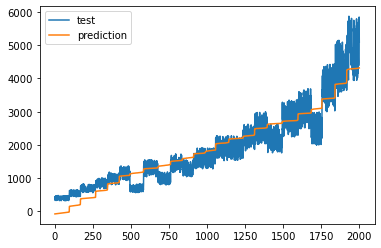

In [21]:
# YOUR CODE HERE
print('Coefficients:', regr.coef_)
print('Mean of column multipled by coefficients',list(X_test.mean()*regr.coef_))
      
#grap result
test_values=y_test.values
predict_values=sales_y_pred
result = pd.DataFrame({
    'test':test_values,
    'prediction':predict_values})
result = result.sort_values('prediction')

plt.plot((list(result['test'])),label='test')
plt.plot((list(result['prediction'])),label='prediction')
plt.legend()
plt.show()
#raise NotImplementedError()

### Discussion:

Discuss your conclusions about this linear regression model (in the next cell).  Which input features are most significant?

### Answer:
perdiction is quite accurate as variance score is 0.88 and  most significat colums are LastSpend Value,SexValue,StateValue.

---
# Part D: Predicting Big Spenders (20 points)

In this section we want to build some machine learning models predict if a new customer is likely to be a big spender or not.  This will be a binary outcome (yes or no), so we can use machine learning *classification* algorithms.

Remember that our definition of 'Big-Spender' is that it is a client whose annual spending level (**SpendValue**) is in the top 25% of our clients.  So the exact dollar cutoff for big spenders will be different for each student, as each of you are working for a different company and are using a different dataset.

Choose two classification algorithms.  Use each one to build and then evaluate a 'big-spender' prediction model.

In [22]:
# YOUR CODE HERE
for s in sales.index:
    if sales['SpendValue'][s]>=2500:
        answer=1
    else:
        answer=0
    sales.loc[s,"BigSpender"]=answer
    
y=sales["BigSpender"]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)
model=GaussianNB()
model.fit(X_train,y_train)
y_predicted=model.predict(X_test)
print(accuracy_score(y_test,y_predicted))
        

0.7835


In [23]:
#decision tree
dt=DecisionTreeClassifier(max_depth=10)
dt.fit(X_train,y_train)
y_predicted=dt.predict(X_test)
print(accuracy_score(y_test,y_predicted))

0.936


### Discussion:

Discuss your conclusions about your two classification models (in the next cell).

Which classification algorithm gives the more accurate results? 

How accurate are the results from your best classifier?

### Answer:
The Decision Tree Model is better than the GaussianNB model because accuracy score ofdecision tree is better than the other.

---
# Part E: Business Recommendations (10 points)

The company you are doing this analysis for wants some recommendations from you about how to find new customers who are likely to be big spenders.  They are wondering if they should focus their advertising on a particular gender?  Or people in a given state, such as Victoria, or NSW?  Or aim at demographic groups who have high income level or medium income levels?  Or other strategies?  What recommendations will you give them?  

Write about 100 words describing your conclusions from your analysis, and your recommendations for the best strategy for attracting new big-spender customers.

## Recommendations
there are number of recommendations to the Company on the basis of gender, State. Some state even after having the most number of the buyer but still the percentage of people of the state buying are very less. This can be seen in "NSW".Even though they share the most market that Green Hat is in. But still, the people of the state percentage wise are very less. So, the company should try to advertise their product in the State of "NSW" as they are a large group of people not buying products in this state. It can also be seen that if we compare to the total population to the number of buyers from each state. The percentage is very small, the maximum percentage that is produced is 0.08% which shows either the people of the country are not interested in the product or the advertising is not being properly done. The state with the most number of "big spender" is "NSW" as on an average a customer is always spending 1500 dollar and above approximately. So, the company should launch high-end products in this state more than any other state